In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pingouin as pg

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#suppress scientific notation
pd.options.display.float_format = '{:.4f}'.format

In [40]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\SIOP 2020')

__Import the data__

In [41]:
data = pd.read_csv('heather_clean_data.csv')

In [42]:
#drop the "unnamed" columns that appear in the data
data.drop(data.columns[data.columns.str.contains('Unnamed') == True], axis = 1, inplace = True)

## looking at ethnic makeup of samples

In [50]:
data.groupby('Ethnic group').size()

Ethnic group
 African American                                                                                             1
African American                                                                                             23
African American                                                                                              4
African American and white                                                                                    1
African American mixed with Vietnamese                                                                        1
African American, Italian,Spanishand nativeamerican                                                           1
African American, partly Caucasian American as I am biracial                                                  1
African american                                                                                              1
African-American                                                                           

## Reverse Score Turnover Items
- I am going to reverse score the turnover items so that they reflect "intent to stay" rather than "intent to leave"

In [51]:
#the max for the turnover items is 5, so I will be just subtracting the item scores from 5
max(data.Turnover_1)

5.0

In [52]:
#reverse score the columns
data.loc[:, 'Turnover_1':'Turnover_3'] = 5 - data.loc[:, 'Turnover_1':'Turnover_3']

In [53]:
#map 0 = Male, 1 = Female, 2 = other onto gender
gender_mapper = {1:0, 2:1, 3:2}
data['Gender'].replace(gender_mapper, inplace = True)

In [54]:
data['Gender'].value_counts()

0.0    168
1.0    159
2.0      5
Name: Gender, dtype: int64

In [57]:
data1 = data.loc[:, 'Learning_1':'Support']
data2 = data.loc[:, 'Belong_1':'Turnover_3']
data3 = data.loc[:, 'MicroInv_1':'Workplace_5']
data4 = data[['Gender', 'Ethnic group']]
df = pd.concat([data1, data2, data3, data4], axis = 1)

In [58]:
df.head(1)

,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,Support,Belong_1,Belong_2,Belong_3,Belong_4,Belong_5,Belong_6,Belong_7,Belong_8,Auth_1,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3,MicroInv_1,MicroInv_2,MicroInv_3,MicroInv_4,MicroInv_5,MicroInv_6,MicroInv_7,MicroInv_8,MicroInv_9,Workplace_1,Workplace_2,Workplace_3,Workplace_4,Workplace_5,Gender,Ethnic group
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,6.0,2.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Mexican American


In [59]:
df.shape

(391, 46)

## Breakdown of Gender Size

In [12]:
df.Gender.value_counts()

0.0    168
1.0    159
2.0      5
Name: Gender, dtype: int64

In [13]:
# profile = measure_data.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="measure_report.html")

## Dropping Missing Values

In [14]:
# Printing the percentage of missing values per column
def percent_missing(dataframe):
    '''
    Prints the percentage of missing values for each column in a dataframe
    '''
    # Summing the number of missing values per column and then dividing by the total
    sumMissing = dataframe.isnull().values.sum(axis=0)
    pctMissing = sumMissing / dataframe.shape[0]
    
    if sumMissing.sum() == 0:
        print('No missing values')
    else:
        # Looping through and printing out each columns missing value percentage
        print('Percent Missing Values:', '\n')
        for idx, col in enumerate(dataframe.columns):
            if sumMissing[idx] > 0:
                print('{0}: {1:.2f}%'.format(col, pctMissing[idx] * 100))

In [15]:
percent_missing(df)
df.shape

Percent Missing Values: 

Learning_1: 15.60%
Learning_2: 15.60%
Learning_3: 16.11%
Learning_4: 15.86%
Learning_5: 17.14%
Learning_6: 15.60%
Learning_7: 15.60%
Learning_8: 15.60%
Learn_1: 15.60%
Learn_2: 15.86%
Support: 15.60%
Belong_1: 16.11%
Belong_2: 16.11%
Belong_3: 16.37%
Belong_4: 17.14%
Belong_5: 16.88%
Belong_6: 17.65%
Belong_7: 16.62%
Belong_8: 16.62%
Auth_1: 16.11%
Auth_2: 16.37%
Auth_3: 16.37%
Auth_4: 16.62%
Auth_5: 16.62%
Auth_6: 16.37%
Auth_7: 16.37%
Auth_8: 16.11%
Turnover_1: 15.35%
Turnover_2: 15.60%
Turnover_3: 15.60%
MicroInv_1: 14.58%
MicroInv_2: 14.58%
MicroInv_3: 14.83%
MicroInv_4: 14.58%
MicroInv_5: 14.58%
MicroInv_6: 14.58%
MicroInv_7: 14.58%
MicroInv_8: 14.83%
MicroInv_9: 14.58%
Workplace_1: 14.32%
Workplace_2: 14.32%
Workplace_3: 14.58%
Workplace_4: 14.58%
Workplace_5: 14.32%
Gender: 15.09%


(391, 45)

In [60]:
#drop NAs
df.dropna(inplace = True)
percent_missing(df)
df.reset_index(drop = True, inplace = True)
df.shape

No missing values


(290, 46)

In [61]:
df.shape

(290, 46)

## How many people felt support?
- 1 = felt support
- 2 = did not

In [62]:
df['Support'].value_counts()

1.0    210
2.0     80
Name: Support, dtype: int64

## Ethnic Group Makeup

In [91]:
df.groupby('Ethnic group').size()

Ethnic group
 African American                                                 1
African American                                                 21
African American                                                  4
African American and white                                        1
African American, Italian,Spanishand nativeamerican               1
African american                                                  1
African-American                                                  2
Afro Latino                                                       1
Afro-Latin American                                               1
American                                                          2
American Hispanic/Latino                                          1
American Indian and Irish American                                1
Arab                                                              1
Asain                                                             1
Asiai                              

## Calculating Mean, Standard Deviation for Each Group

In [63]:
#mean, std for learning_1 through Learn_2
df['learning_mean'] = df.loc[:, 'Learning_1':'Learn_2'].mean(axis = 1)
df['learning_std'] = round(df.loc[:, 'Learning_1':'Learn_2'].std(axis = 1), 3)

#mean, std for Turnover_1 through Turnover_3
df['turnover_mean'] = df.loc[:, 'Turnover_1':'Turnover_3'].mean(axis = 1)
df['turnover_std'] = round(df.loc[:, 'Turnover_1':'Turnover_3'].std(axis = 1), 3)

#mean, std for Authenticity and Belonging questions
df['inclusion_mean'] = df.loc[:, 'Belong_1':'Auth_8'].mean(axis = 1)
df['inclusion_std'] = round(df.loc[:, 'Belong_1':'Auth_8'].std(axis = 1), 3)

#get count, std for MicroInv - Workplace 
df['micro_std'] = round(df.loc[:, 'MicroInv_1':'Workplace_5'].std(axis = 1), 3)
#now getting count
mapper = {2.0:0.0} #create mapper to replace 2s with 0s
df['micro_count'] = df.loc[:, 'MicroInv_1':'Workplace_5'].replace(mapper).sum(axis = 1) #replace values = 2 with 0 so that our count is only for 1s in the rows

## Correlation Matrix for Means and Standard Deviations

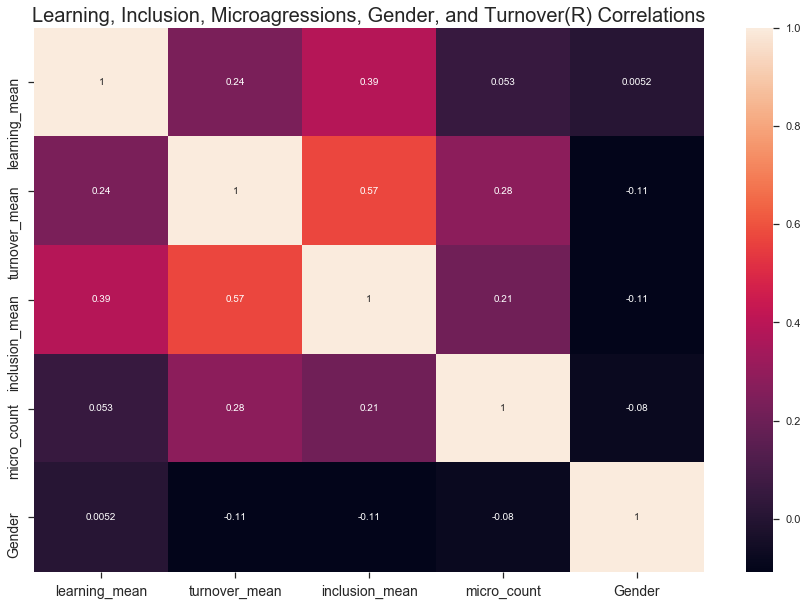

In [64]:
corr_data = df[['learning_mean', 'turnover_mean', 'inclusion_mean', 'micro_count', 'Gender']]

#plot the heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_data.corr(), annot = True)
plt.title('Learning, Inclusion, Microagressions, Gender, and Turnover(R) Correlations', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

__Correlations with p-values and corrections, bonferroni stepdown adjustments__

In [99]:
pg.pairwise_corr(corr_data, columns=['Gender', 'inclusion_mean', 'turnover_mean', 'micro_count', 'learning_mean'])

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Gender,inclusion_mean,pearson,two-sided,290,-0.1080,"[-0.22, 0.01]",0.0120,0.0050,-0.1080,0.0661,0.395,0.4530
1,Gender,turnover_mean,pearson,two-sided,290,-0.1050,"[-0.22, 0.01]",0.0110,0.0040,-0.1050,0.0737,0.361,0.4330
2,Gender,micro_count,pearson,two-sided,290,-0.0800,"[-0.19, 0.04]",0.0060,-0.0010,-0.0800,0.1736,0.185,0.2750
3,Gender,learning_mean,pearson,two-sided,290,0.0050,"[-0.11, 0.12]",0.0000,-0.0070,0.0050,0.9304,0.074,0.0510
4,inclusion_mean,turnover_mean,pearson,two-sided,290,0.5720,"[0.49, 0.64]",0.3270,0.3220,0.6500,0.0000,2.85e+23,1.0000
5,inclusion_mean,micro_count,pearson,two-sided,290,0.2100,"[0.1, 0.32]",0.0440,0.0370,0.2130,0.0003,46.647,0.9510
6,inclusion_mean,learning_mean,pearson,two-sided,290,0.3870,"[0.28, 0.48]",0.1490,0.1440,0.4080,0.0000,8.329e+08,1.0000
7,turnover_mean,micro_count,pearson,two-sided,290,0.2840,"[0.18, 0.39]",0.0810,0.0750,0.2920,0.0000,1.279e+04,0.9990
8,turnover_mean,learning_mean,pearson,two-sided,290,0.2370,"[0.13, 0.34]",0.0560,0.0500,0.2420,0.0000,296.593,0.9840
9,micro_count,learning_mean,pearson,two-sided,290,0.0530,"[-0.06, 0.17]",0.0030,-0.0040,0.0530,0.3662,0.11,0.1480


## Create Composite of "Learn" and "Learning" Items and Correlate them

In [66]:
learning_items = df.loc[:,'Learning_1':'Learning_8']
learning_items['learning_composite'] = learning_items.mean(axis = 1)

learn_items = df.loc[:, 'Learn_1':'Learn_2']
learn_items['learn_composite'] = learn_items.mean(axis = 1)

learning_df = pd.concat([learning_items,learn_items], axis = 1)

#correlate the composites
pg.corr(learning_df['learning_composite'], learning_df['learn_composite'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,290,0.259,"[0.15, 0.36]",0.067,0.06,0.000008,1486.151,0.994


## How do 'learn' and 'learning' composite scores correlate with everything else?

In [100]:
new_corr_data = pd.concat([corr_data, learning_df], axis = 1)[['turnover_mean', 'inclusion_mean', 'micro_count', 'learning_composite', 'learn_composite', 'Gender']]
pg.pairwise_corr(new_corr_data)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,turnover_mean,inclusion_mean,pearson,two-sided,290,0.5720,"[0.49, 0.64]",0.3270,0.3220,0.6500,0.0000,2.85e+23,1.0000
1,turnover_mean,micro_count,pearson,two-sided,290,0.2840,"[0.18, 0.39]",0.0810,0.0750,0.2920,0.0000,1.279e+04,0.9990
2,turnover_mean,learning_composite,pearson,two-sided,290,0.1740,"[0.06, 0.28]",0.0300,0.0230,0.1760,0.0030,5.904,0.8460
3,turnover_mean,learn_composite,pearson,two-sided,290,0.2650,"[0.15, 0.37]",0.0700,0.0640,0.2710,0.0000,2414.525,0.9960
4,turnover_mean,Gender,pearson,two-sided,290,-0.1050,"[-0.22, 0.01]",0.0110,0.0040,-0.1050,0.0737,0.361,0.4330
5,inclusion_mean,micro_count,pearson,two-sided,290,0.2100,"[0.1, 0.32]",0.0440,0.0370,0.2130,0.0003,46.647,0.9510
6,inclusion_mean,learning_composite,pearson,two-sided,290,0.3060,"[0.2, 0.41]",0.0940,0.0880,0.3160,0.0000,9.689e+04,1.0000
7,inclusion_mean,learn_composite,pearson,two-sided,290,0.3700,"[0.27, 0.47]",0.1370,0.1310,0.3880,0.0000,1.046e+08,1.0000
8,inclusion_mean,Gender,pearson,two-sided,290,-0.1080,"[-0.22, 0.01]",0.0120,0.0050,-0.1080,0.0661,0.395,0.4530
9,micro_count,learning_composite,pearson,two-sided,290,-0.0440,"[-0.16, 0.07]",0.0020,-0.0050,-0.0440,0.4572,0.097,0.1150


## Getting Cronbach's Alpha for Learning, Belonging+Authenticity, and Turnover

In [68]:
#get chronbachs alpha for subsets of measures
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

In [69]:
#get alpha for "learning" variables
learning_alpha = cronbach_alpha(df.loc[:, 'Learning_1':'Learn_2'])
print(f"Cronbach's Alpha for Learning: {learning_alpha}")

print('  ')

#get alpha for "Turnover"
turnover_alpha = cronbach_alpha(df.loc[:, 'Turnover_1':'Turnover_3'])
print(f"Cronbach's Alpha for Turnover: {turnover_alpha}")

print('   ')

#get alpha for belonging and authenticity
belonging_alpha = cronbach_alpha(df.loc[:, 'Belong_1':'Auth_8'])
print(f"Cronbach's Alpha for Belonging and Authenticity: {belonging_alpha}")

Cronbach's Alpha for Learning: 0.9184519573466182
  
Cronbach's Alpha for Turnover: 0.9143302639991759
   
Cronbach's Alpha for Belonging and Authenticity: 0.9751551649686664


# Begin Factor Analysis

In [73]:
#using bartlett test to confirm that we should use a factor analysis, 0 p value indicates we should
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
features = df.loc[:, 'Learning_1':'Learn_2']

chi_square_value,p_value=calculate_bartlett_sphericity(features)
chi_square_value, p_value

(3185.0466207131076, 0.0)

In [71]:
#KMO test, values above 60 are great and indicate that the data is stable enough for a factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(features)
kmo_model

0.8997458623065959

## Getting Eigenvalues

In [74]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(features, 10, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,6.625854
1,1.723698
2,0.445612
3,0.302068
4,0.216477
5,0.199041
6,0.150629
7,0.121378
8,0.116993
9,0.098249


## Scree Plot
- We can see from the scree plot that there are only two factors who's eigenvalues are above 1, thus 2 factors are explaining most of the variance in the data, so 2 factors makes sense
- we could have also just used the eigenvalue table above, but its more fun to see it plotted out

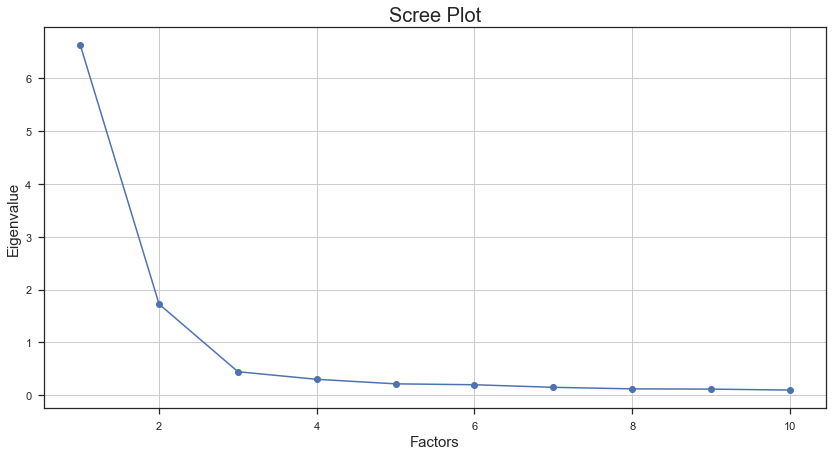

In [75]:
# Create scree plot using matplotlib
plt.figure(figsize = (14, 7))
plt.scatter(range(1,features.shape[1]+1),ev)
plt.plot(range(1,features.shape[1]+1),ev)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Factors', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()
plt.show()

## Factor Analysis with 2 Factors
- using Maximum Likelihood and a promax rotation (since factors will be correlated with each other theoretically)

In [76]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(features, 2, method = 'ml', rotation = 'promax')
fa.loadings

,Factor1,Factor2
Learning_1,0.846709,0.008281
Learning_2,0.878613,0.043697
Learning_3,0.893093,0.017901
Learning_4,0.872133,0.042749
Learning_5,0.865857,0.030989
Learning_6,0.912230,-0.026397
Learning_7,0.910458,-0.049903
Learning_8,0.879998,-0.060766
Learn_1,0.008045,0.962055
Learn_2,-0.009448,0.919294


In [77]:
composite_df = df[['turnover_mean', 'inclusion_mean', 'learning_mean', 'micro_count']]

In [78]:
composite_df.to_csv('composite_df.csv')

In [79]:
features.to_csv('factor_analysis_data.csv')

In [80]:
composite_df.head()

,turnover_mean,inclusion_mean,learning_mean,micro_count
0,4.0,3.8750,2.6,14.0
1,0.0,1.8125,2.6,6.0
2,3.0,4.5000,4.2,14.0
3,3.0,4.0000,4.0,14.0
4,3.0,4.5000,3.6,14.0


## Run Mediation
- using pingouin to conduct mediation analysis
- Regressing inclusion on learning for "a" path
- Regressing turnover on learning + inclusion for "b" path
    - B weight in the output is "c" path
- Running a mediation analysis with the IV (learning), Mediator (inclusion), and DV (turnover)

In [81]:
#Baron and Kenny Method.
#First, regress inclusion on learning to obtain a path.
pg.linear_regression(composite_df['learning_mean'], composite_df['inclusion_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.752799,0.155321,17.723329,4.901526e-48,0.149453,0.146499,2.447092,3.058507
1,learning_mean,0.361863,0.050868,7.113753,8.975483e-12,0.149453,0.146499,0.261742,0.461983


In [82]:
#Next, obtain c path by regressing turnover on learning and inclusion
pg.linear_regression(composite_df[['learning_mean', 'inclusion_mean']], composite_df['turnover_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.208528,0.300218,-4.025509,7.280749e-05,0.327235,0.322546,-1.799436,-0.617621
1,learning_mean,0.027157,0.073732,0.368321,7.129055e-01,0.327235,0.322546,-0.117968,0.172282
2,inclusion_mean,0.846697,0.078771,10.748840,7.183553e-23,0.327235,0.322546,0.691655,1.001740


__Indirect effect is significant__

In [83]:
# https://github.com/raphaelvallat/pingouin
# Conduct bootsrapping procedure to determine significance of indirect effect
# (apath * bpath).
pg.mediation_analysis(data=composite_df, x = 'learning_mean', m = 'inclusion_mean', y = 'turnover_mean', seed=42, n_boot=5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.3619,0.0509,8.975483e-12,0.2617,0.4620,Yes
1,Y ~ inclusion_mean,0.8579,0.0725,1.424077e-26,0.7151,1.0007,Yes
2,Total,0.3335,0.0804,4.400656e-05,0.1753,0.4918,Yes
3,Direct,0.0272,0.0737,7.129055e-01,-0.1180,0.1723,No
4,Indirect,0.3064,0.0496,0.000000e+00,0.2124,0.4090,Yes


## Run mediation on Learn and Learning variables seaparately

In [87]:
pg.mediation_analysis(data = composite_df, x = 'learning_composite', m = 'inclusion_mean', y = 'turnover_mean', seed = 43, n_boot = 5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.2662,0.0487,1.023972e-07,0.1703,0.3622,Yes
1,Y ~ inclusion_mean,0.8579,0.0725,1.424077e-26,0.7151,1.0007,Yes
2,Total,0.2266,0.0757,2.985277e-03,0.0777,0.3755,Yes
3,Direct,-0.0020,0.0663,9.764574e-01,-0.1325,0.1286,No
4,Indirect,0.2286,0.0436,0.000000e+00,0.1440,0.3167,Yes


In [88]:
pg.mediation_analysis(data = composite_df, x = 'learn_composite', m = 'inclusion_mean', y = 'turnover_mean', seed = 44, n_boot = 5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.2092,0.0309,7.556023e-11,0.1483,0.2700,Yes
1,Y ~ inclusion_mean,0.8579,0.0725,1.424077e-26,0.7151,1.0007,Yes
2,Total,0.2245,0.0482,4.824572e-06,0.1297,0.3193,Yes
3,Direct,0.0522,0.0441,2.370150e-01,-0.0345,0.1390,No
4,Indirect,0.1723,0.0316,0.000000e+00,0.1147,0.2401,Yes


# Running a Regression on Turnover and Inclusion separately, with both Learning and Learn separated out

In [85]:
#concatening the learn and learning composites separated out with the composite df
composite_df = pd.concat([composite_df, learning_df[['learning_composite', 'learn_composite']]], axis = 1)

In [89]:
#regressing inclusion on learn and learning
pg.linear_regression(composite_df[['learning_composite', 'learn_composite']], composite_df['inclusion_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.596056,0.158747,16.35341,6.207775e-43,0.184526,0.178843,2.283599,2.908512
1,learning_composite,0.196090,0.047958,4.08876,5.636550e-05,0.184526,0.178843,0.101695,0.290484
2,learn_composite,0.176159,0.031180,5.64969,3.870366e-08,0.184526,0.178843,0.114788,0.237531


In [90]:
#regressing turnover on learn and learning
pg.linear_regression(composite_df[['learning_composite', 'learn_composite']], composite_df['turnover_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.921305,0.252724,3.645505,0.000317,0.082006,0.075609,0.423878,1.418731
1,learning_composite,0.147091,0.076349,1.926567,0.055021,0.082006,0.075609,-0.003184,0.297366
2,learn_composite,0.199770,0.049639,4.024476,0.000073,0.082006,0.075609,0.102068,0.297472
